In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
import pandas as pd
import math
from statsmodels.tsa.seasonal import STL
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [35]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
np.random.seed(5)

In [37]:
DATASET = "papas_g2.csv"
CROP = "PAPA YUNGAY"

In [38]:
data = pd.read_csv('../Data/'+DATASET, engine='python')
data = data[data.producto == CROP]["precio_mean"]
data

525    0.576452
526    0.516452
527    0.505714
528    0.612581
529    0.698667
         ...   
625    1.777333
626    1.569677
627    1.476333
628    1.581290
629    1.467000
Name: precio_mean, Length: 105, dtype: float64

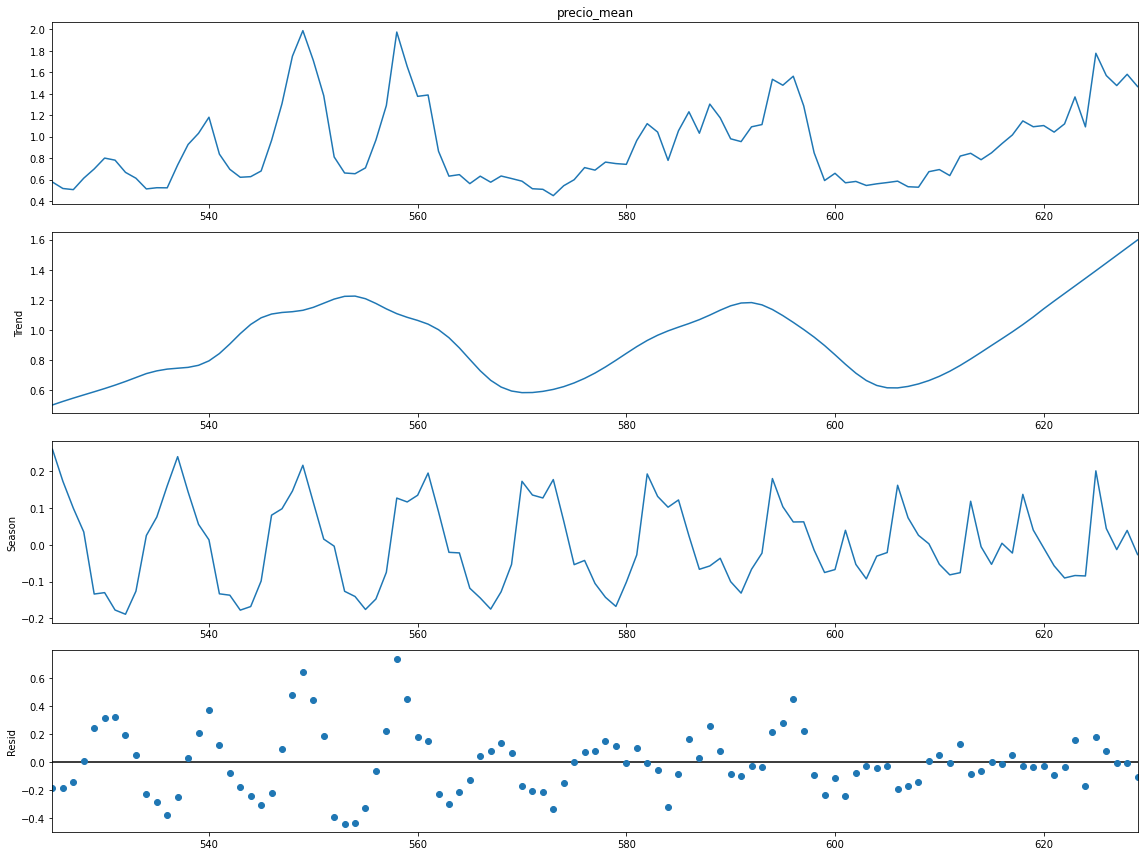

In [39]:
stl = STL(data, seasonal=13, period=12)
res = stl.fit()
fig = res.plot()

In [40]:
data_trend = res.trend
data_season = res.seasonal
data_resid = res.resid

In [41]:
data_trend = data_trend.values
data_trend = data_trend.astype('float32')

data_season = data_season.values
data_season = data_season.astype('float32')

data_resid = data_resid.values
data_resid = data_resid.astype('float32')

In [42]:
scaler_trend = MinMaxScaler(feature_range=(0, 1))
data_trend = scaler_trend.fit_transform(data_trend.reshape(-1,1))

scaler_season = MinMaxScaler(feature_range=(0, 1))
data_season = scaler_season.fit_transform(data_season.reshape(-1,1))

scaler_resid = MinMaxScaler(feature_range=(0, 1))
data_resid = scaler_resid.fit_transform(data_resid.reshape(-1,1))
len(data_resid),len(data_season),len(data_trend)

(105, 105, 105)

In [43]:
train_size = int(data_trend.shape[0]*0.8)

train_trend = data_trend[0:train_size,:]
test_trend = data_trend[train_size:len(data_trend),:]

train_season = data_season[0:train_size,:]
test_season = data_season[train_size:len(data_season),:]

train_resid = data_resid[0:train_size,:]
test_resid = data_resid[train_size:len(data_resid),:]

In [44]:
time_steps = 3
n_features = 1
n_epochs = 100

In [45]:
trainX_trend, trainY_trend = create_dataset(train_trend, time_steps)
testX_trend, testY_trend = create_dataset(test_trend, time_steps)

trainX_season, trainY_season = create_dataset(train_season, time_steps)
testX_season, testY_season = create_dataset(test_season, time_steps)

trainX_resid, trainY_resid = create_dataset(train_resid, time_steps)
testX_resid, testY_resid = create_dataset(test_resid, time_steps)

In [46]:
trainX_trend = np.reshape(trainX_trend, (trainX_trend.shape[0], trainX_trend.shape[1], 1))
testX_trend = np.reshape(testX_trend, (testX_trend.shape[0], testX_trend.shape[1], 1))

trainX_season = np.reshape(trainX_season, (trainX_season.shape[0], trainX_season.shape[1], 1))
testX_season = np.reshape(testX_season, (testX_season.shape[0], testX_season.shape[1], 1))

trainX_resid = np.reshape(trainX_resid, (trainX_resid.shape[0], trainX_resid.shape[1], 1))
testX_resid = np.reshape(testX_resid, (testX_resid.shape[0], testX_resid.shape[1], 1))

In [47]:
model_trend = Sequential()
model_trend.add(LSTM(4, input_shape=(time_steps, 1)))
model_trend.add(Dense(1))
model_trend.compile(loss='mean_squared_error', optimizer='adam')
model_trend.fit(trainX_trend, trainY_trend, epochs=100, batch_size=1, verbose=2)

model_season = Sequential()
model_season.add(LSTM(4, input_shape=(time_steps, 1)))
model_season.add(Dense(1))
model_season.compile(loss='mean_squared_error', optimizer='adam')
model_season.fit(trainX_season, trainY_season, epochs=100, batch_size=1, verbose=2)

model_resid = Sequential()
model_resid.add(LSTM(4, input_shape=(time_steps, 1)))
model_resid.add(Dense(1))
model_resid.compile(loss='mean_squared_error', optimizer='adam')
model_resid.fit(trainX_resid, trainY_resid, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
80/80 - 1s - loss: 0.0580 - 852ms/epoch - 11ms/step
Epoch 2/100
80/80 - 0s - loss: 0.0182 - 63ms/epoch - 794us/step
Epoch 3/100
80/80 - 0s - loss: 0.0125 - 62ms/epoch - 781us/step
Epoch 4/100
80/80 - 0s - loss: 0.0102 - 64ms/epoch - 800us/step
Epoch 5/100
80/80 - 0s - loss: 0.0086 - 64ms/epoch - 800us/step
Epoch 6/100
80/80 - 0s - loss: 0.0070 - 63ms/epoch - 788us/step
Epoch 7/100
80/80 - 0s - loss: 0.0059 - 62ms/epoch - 769us/step
Epoch 8/100
80/80 - 0s - loss: 0.0051 - 65ms/epoch - 813us/step
Epoch 9/100
80/80 - 0s - loss: 0.0044 - 64ms/epoch - 806us/step
Epoch 10/100
80/80 - 0s - loss: 0.0040 - 69ms/epoch - 856us/step
Epoch 11/100
80/80 - 0s - loss: 0.0038 - 70ms/epoch - 875us/step
Epoch 12/100
80/80 - 0s - loss: 0.0037 - 63ms/epoch - 787us/step
Epoch 13/100
80/80 - 0s - loss: 0.0037 - 69ms/epoch - 863us/step
Epoch 14/100
80/80 - 0s - loss: 0.0036 - 63ms/epoch - 794us/step
Epoch 15/100
80/80 - 0s - loss: 0.0036 - 63ms/epoch - 794us/step
Epoch 16/100
80/80 - 0s - loss: 0.

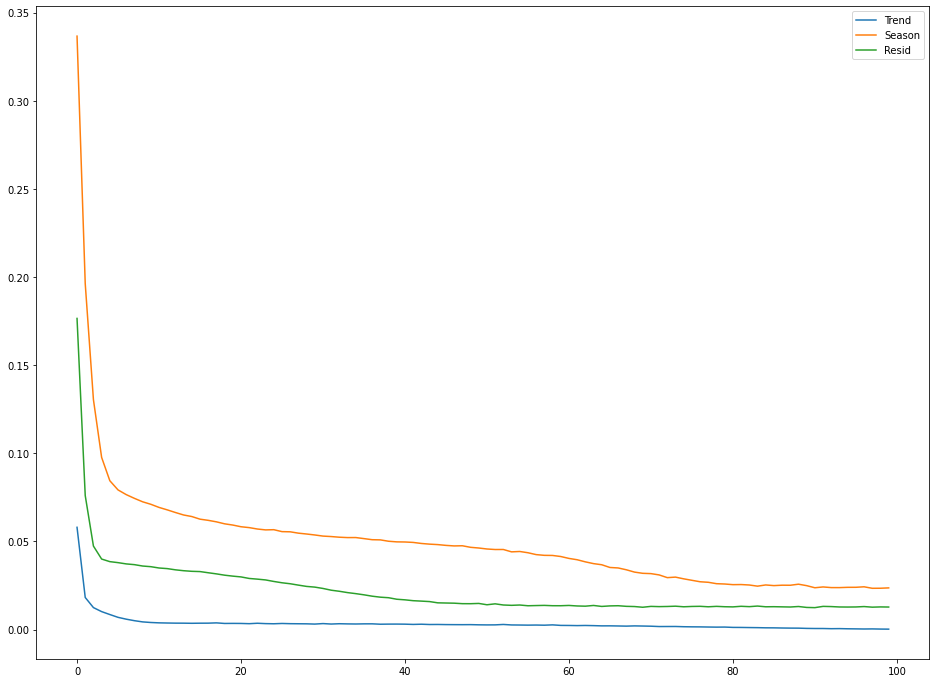

In [48]:
loss_per_epoch = model_trend.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

loss_per_epoch = model_season.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

loss_per_epoch = model_resid.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

plt.legend(['Trend','Season','Resid'])
plt.show()

In [49]:
trainPredict_trend = model_trend.predict(trainX_trend)
testPredict_trend = model_trend.predict(testX_trend)

trainPredict_season = model_season.predict(trainX_season)
testPredict_season = model_season.predict(testX_season)

trainPredict_resid = model_resid.predict(trainX_resid)
testPredict_resid = model_resid.predict(testX_resid)

1/1 [==============================] - 0s 10ms/step


In [50]:
trainPredict_trend = scaler_trend.inverse_transform(trainPredict_trend)
trainY_trend = scaler_trend.inverse_transform([trainY_trend])
testPredict_trend = scaler_trend.inverse_transform(testPredict_trend)
testY_trend = scaler_trend.inverse_transform([testY_trend])

trainPredict_season = scaler_season.inverse_transform(trainPredict_season)
trainY_season = scaler_season.inverse_transform([trainY_season])
testPredict_season = scaler_season.inverse_transform(testPredict_season)
testY_season = scaler_season.inverse_transform([testY_season])

trainPredict_resid = scaler_resid.inverse_transform(trainPredict_resid)
trainY_resid = scaler_resid.inverse_transform([trainY_resid])
testPredict_resid = scaler_resid.inverse_transform(testPredict_resid)
testY_resid = scaler_resid.inverse_transform([testY_resid])


In [51]:

trainFinalPredict = trainPredict_trend[:,0]+trainPredict_season[:,0]+trainPredict_resid[:,0]
testFinalPredict = testPredict_trend[:,0]+testPredict_season[:,0]+testPredict_resid[:,0]

trainScore = mean_absolute_percentage_error(data.values[time_steps:len(trainFinalPredict)+time_steps], trainFinalPredict)
print('Train Score: %.2f MAPE' % (trainScore))
testScore = mean_absolute_percentage_error(data.values[-len(testFinalPredict):], testFinalPredict)
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.12 MAPE
Test Score: 0.12 MAPE


In [52]:
gap = [None for _ in range(data.shape[0] - (len(trainFinalPredict)+len(testFinalPredict)) - time_steps)]

predictPlot = np.concatenate(([None for _ in range(time_steps)], trainFinalPredict, gap,testFinalPredict))

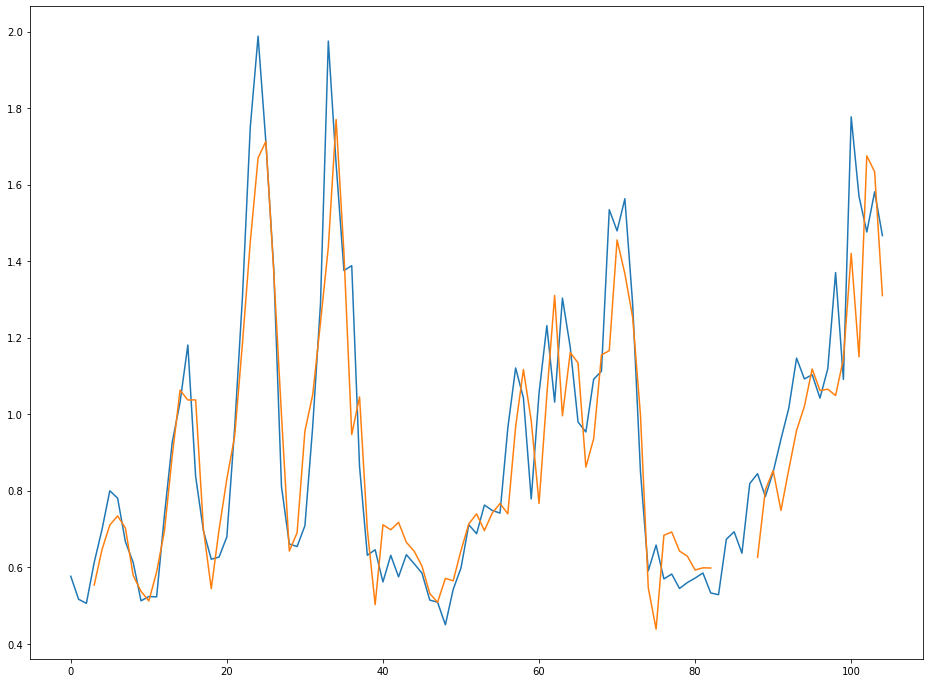

In [53]:
plt.plot(data.values)
plt.plot(predictPlot)
plt.show()